In [4]:
import pandas as pd
import glob
import os

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import BayesianRidge , LinearRegression
from sklearn import preprocessing

In [13]:
# change into the directory where the Testing and Training data are located
wd = os.path.abspath("TrainTestingData")

# read all files into an dataframe and save dataframes to the df_list
training_set = wd + "/training_set_with_features.csv"
testing_set = wd + "/testing_set_with_features.csv"
df_train = pd.read_csv(training_set)
#cause some variables are of significance based on the feature importance, we try different combinations to form a quadratic function in order to improve accuracy
#quadratic function
df_train.head()


df_test = pd.read_csv(testing_set)



# Normalization

In [14]:
#since the scale of each feature varies, we run into accuracy of 0% a lot. Therefore,
#we use normalization to balance the performance of each feature in the model

# We eliminate "Date" column from both test and train data
# We use the try-except in case if we rerun the program, the dataframes no longer has the "DATE" column
try:
    del df_test["DATE"]
    del df_train["DATE"]
except:
    print("Already deleted the 'DATE'column in both df_test and df_train dataframes")

#normalize the training  original data set because it was giving a huge scale since huge scale in different column levels
# are very hard to train the model, so we need to scale
min_max_scaler = preprocessing.MinMaxScaler()
#generalization technique to put all pandas to more acceptable range so that all columns are in the similar range

train_scaled_parse = min_max_scaler.fit_transform(df_train)
#fit the model based on scale
train_scaled = pd.DataFrame(train_scaled_parse)#create dataframe
train_scaled
X,y=train_scaled.drop([17], axis=1), train_scaled[17]#separate features and target variable


In [15]:
#Here, we preprocess the test set as well to make it aligned to the training set
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()#repeating the same procedure for testing set

test_scaled_parse = min_max_scaler.fit_transform(df_test)
test_scaled = pd.DataFrame(test_scaled_parse)
test_scaled

X_test,y_test = test_scaled.drop([17], axis=1), test_scaled[17]

In [16]:
X.head()#to examine whether the variables are in shape
y.head()
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.342105,0.888889,0.000000,0.000000,0.000000,0.000000,0.666667,0.573394,0.000000,0.000000,0.272727,0.000000,0.000000,0.028217,0.68,0.000000,0.000000
1,0.000000,0.888889,0.050399,0.041667,0.011624,0.316364,0.666667,0.294889,0.023810,0.333333,0.363636,0.051724,0.026178,0.000000,0.64,0.000000,0.000000
2,0.303509,1.000000,0.091952,0.020833,0.074299,0.269091,0.666667,0.339450,0.095238,0.333333,0.636364,0.103448,0.068063,0.095664,0.32,0.000000,0.000000
3,0.484211,1.000000,0.127025,0.031250,0.164018,0.543636,0.400000,0.222805,0.142857,0.555556,0.545455,0.068966,0.240838,0.193393,0.60,0.103853,0.103853
4,0.140351,0.666667,0.185755,0.031250,0.252218,0.123636,0.466667,0.216252,0.119048,0.555556,0.818182,0.068966,0.209424,0.244666,0.48,0.103853,0.103853


# Plot the Data to see how the data trend looks like 

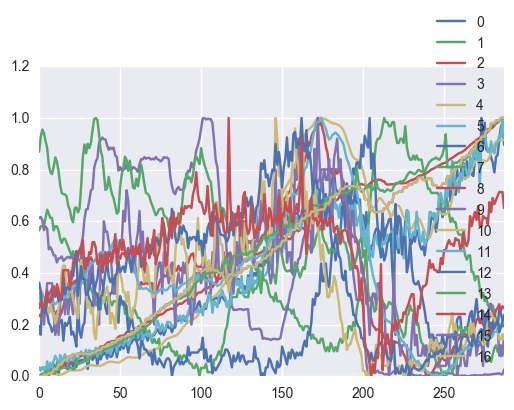

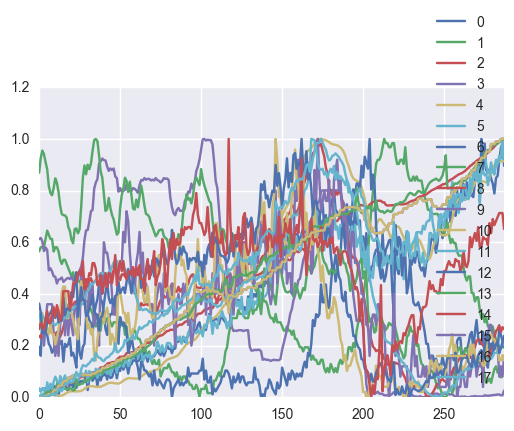

In [17]:
X.plot()#to observe the trend for each variable
train_scaled.plot()#to observe the interaction between target variable and x

# Start to train the model using machine learning algorithms
### SVM

In [18]:

clf= svm.SVR()#to train the model using SVM because of the linear trend
#lab_enc = preprocessing.LabelEncoder()
clf.fit(X, y)#fitting the algorithm using the training model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predict the y using our model and also perform accuracy determination

In [19]:
acc_SvmSvr =round(clf.score(X_test, y_test)*100,0)
y_pred_Svmsvr = clf.predict(X_test)

print(str(acc_SvmSvr)+'percent')
#using the test variables, to predict the target and compare it with the test y

80.0percent


### Bayesian Ridge

In [20]:
clf1 = BayesianRidge(n_iter= 500)
clf1.fit(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=500,
       normalize=False, tol=0.001, verbose=False)

In [21]:
acc_Bayesian =round(clf1.score(X_test, y_test)*100,2)
print(str(acc_Bayesian)+'percent')
#using the test variables, to predict the target and compare it with the test ya

57.54percent


### Random Forest Regressor

In [22]:
clf_random = RandomForestRegressor(n_estimators=500)
clf_random.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
acc_random_forest =round(clf_random.score(X_test, y_test)*100,2)
print(str(acc_random_forest)+'percent')
print(clf_random.feature_importances_)
   
#using the test variables, to predict the target and compare it with the test ya

73.93percent
[ 0.06364113  0.01079525  0.26247908  0.0026329   0.40404931  0.0449185
  0.0073044   0.00069702  0.00360295  0.00069911  0.00082826  0.00252206
  0.00050143  0.16265209  0.00124688  0.01412894  0.01730067]


### Decision tree Regressor

In [24]:
clf_tree = tree.DecisionTreeRegressor()
clf_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [25]:
acc_tree =round(clf_tree.score(X_test, y_test)*100,2)
print(str(acc_tree)+'percent')

#using the test variables, to predict the target and compare it with the test ya

56.12percent


### Gradient Boosting Regressor

In [26]:
clf_gbr = GradientBoostingRegressor( n_estimators=500)
clf_gbr.fit(X,y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [27]:
acc_gbr =round(clf_gbr.score(X_test, y_test)*100,2)
print(str(acc_gbr)+'percent')




73.14percent


### RMSE Calculation based on the best model for our naive assumption


In [28]:
#calculate RMSE 
#Best RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_svm = sqrt(mean_squared_error(y_test,y_pred_Svmsvr ))
rms_svm

0.12922617433135153

### Try to perform a better model selection by using backward elimination

In [29]:
#Backward elimination

X_model_selection = X.drop([11], axis=1)
X_test_selection = X_test.drop([11], axis=1)

In [30]:
X_model_selection.head()

,0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16
0,0.027106,0.564516,0.000000,0.612056,0.000413,0.035070,0.195402,0.869127,0.237918,0.28,0.265306,0.362824,0.000000,0.263566,0.000000,0.000000
1,0.029608,0.580645,0.004319,0.616692,0.000000,0.021042,0.160920,0.925594,0.230483,0.28,0.326531,0.329759,0.005643,0.286822,0.000000,0.000000
2,0.029608,0.580645,0.009357,0.604328,0.001468,0.035070,0.298851,0.955066,0.252788,0.28,0.326531,0.252904,0.007272,0.279070,0.000000,0.000000
3,0.030442,0.580645,0.007917,0.565688,0.003919,0.035070,0.298851,0.940970,0.249071,0.20,0.265306,0.246649,0.010597,0.263566,0.005936,0.005936
4,0.034612,0.612903,0.007198,0.579598,0.006846,0.000000,0.287356,0.910132,0.252788,0.28,0.285714,0.253798,0.016223,0.302326,0.005936,0.005936


In [31]:
# test model selection
clf_test= svm.SVR()
clf_test.fit(X_model_selection,y)
acc_SvmSvr_model_selection =round(clf_test.score(X_test_selection, y_test)*100,2)
print(str(acc_SvmSvr_model_selection)+'percent')

78.21percent


# Summary
### In this original file, we perform the naive assumption of walking through the steps of developing a machine learning model and then train, test it. 
### However, it's not accurate enough as we want to get to a optimize level of feature selections. In the next file, we will perform our subsequence alogrithm to get all possible subsequence combination of our features and try each of those feature combinations on different models to measure and record the feature combination with the best performance accuracy, and then perform further calculation to get the lowest RMSE.